Linear Regression dataset & KNN regression 

EDA-process

Python Librar's importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.executable


'/usr/local/bin/python3'

In [36]:
df = pd.read_csv("/Users/simhadrikondapally/Downloads/financial_regression.csv")
df

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.1400,114.4200,114.93,115646960.0,0.7200,46.26,46.520,46.2200,...,45.0200,43.8600,44.84,364528.0,1.1600,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.8400,113.2000,113.64,212252769.0,1.6400,46.46,46.550,45.6500,...,45.7600,44.4000,45.76,442210.0,1.3600,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.1300,113.5900,115.06,138671890.0,1.5400,45.96,46.640,45.9500,...,47.0800,45.7000,46.94,629150.0,1.3800,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.4500,112.9800,113.89,216330645.0,1.4700,46.27,46.604,45.4300,...,47.3100,45.1700,47.05,643198.0,2.1400,109.97,110.05,108.46,108.94,17534231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2024-10-17,585.91,586.1200,582.1600,582.35,34393714.0,3.9600,496.44,496.490,491.1901,...,96.0259,94.5400,95.68,52414.0,1.4859,247.75,249.06,247.62,248.63,5176170.0
3900,2024-10-18,584.07,585.3900,582.5800,584.59,37416801.0,2.8100,494.06,495.570,493.3000,...,99.6600,97.2700,99.46,205027.0,2.3900,250.00,251.37,249.90,251.27,7833614.0
3901,2024-10-21,583.85,584.8500,580.6001,583.63,36439010.0,4.2499,493.25,496.230,491.3100,...,98.3500,95.8900,97.35,227394.0,2.4600,252.74,253.14,250.73,251.22,9258590.0
3902,2024-10-22,581.05,584.5000,580.3800,583.32,34183835.0,4.1200,492.73,497.445,491.9700,...,99.5899,97.9600,99.41,136431.0,1.6299,253.06,253.94,252.52,253.93,5756321.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [38]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [39]:
df.shape

(3904, 47)

In [40]:
df.columns

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')

In [41]:
df.duplicated().sum()

0

In [42]:
df.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [44]:
df["sp500 close"].fillna(df["sp500 close"].mean(), inplace=True)
df["sp500 high"].fillna(df["sp500 high"].mean(), inplace=True)
df["sp500 high-low"].fillna(df["sp500 high-low"].mean(), inplace=True)
df["sp500 low"].fillna(df["sp500 low"].mean(), inplace=True)
df["sp500 open"].fillna(df["sp500 open"].mean(), inplace=True)
df["sp500 volume"].fillna(df["sp500 volume"].mean(), inplace=True)
df["gold high"].fillna(df["gold high"].mean(), inplace=True)
df["gold low"].fillna(df["gold low"].mean(), inplace=True)
df["gold open"].fillna(df["gold open"].mean(), inplace=True)
df["gold volume"].fillna(df["gold volume"].mean(), inplace=True)
df["eur_usd"].fillna(df["eur_usd"].mean(), inplace=True)
df["usd_chf"].fillna(df["usd_chf"].mean(), inplace=True)
df["nasdaq close"].fillna(df["nasdaq close"].mean(), inplace=True)
df["nasdaq high"].fillna(df["nasdaq high"].mean(), inplace=True)
df["nasdaq high-low"].fillna(df["nasdaq high-low"].mean(), inplace=True)
df["nasdaq low"].fillna(df["nasdaq low"].mean(), inplace=True)
df["nasdaq open"].fillna(df["nasdaq open"].mean(), inplace=True)
df["nasdaq volume"].fillna(df["nasdaq volume"].mean(), inplace=True)
df["oil close"].fillna(df["oil close"].mean(), inplace=True)
df["oil high"].fillna(df["oil high"].mean(), inplace=True)
df["oil high-low"].fillna(df["oil high-low"].mean(), inplace=True)
df["oil low"].fillna(df["oil low"].mean(), inplace=True)
df["oil open"].fillna(df["oil open"].mean(), inplace=True)
df["oil volume"].fillna(df["oil volume"].mean(), inplace=True)
df["palladium close"].fillna(df["palladium close"].mean(), inplace=True)
df["palladium high"].fillna(df["palladium high"].mean(), inplace=True)
df["palladium high-low"].fillna(df["palladium high-low"].mean(), inplace=True)
df["palladium low"].fillna(df["palladium low"].mean(), inplace=True)
df["palladium open"].fillna(df["palladium open"].mean(), inplace=True)
df["platinum volume"].fillna(df["platinum volume"].mean(), inplace=True)
df["silver close"].fillna(df["silver close"].mean(), inplace=True)
df["silver high"].fillna(df["silver high"].mean(), inplace=True)
df["silver high-low"].fillna(df["silver high-low"].mean(), inplace=True)
df["silver low"].fillna(df["silver low"].mean(), inplace=True)
df["silver open"].fillna(df["silver open"].mean(), inplace=True)
df["silver volume"].fillna(df["silver volume"].mean(), inplace=True)
df["CPI"].fillna(df["CPI"].median(), inplace=True)
df["GDP"].fillna(df["GDP"].median(), inplace=True)
df["us_rates_%"].fillna(df["us_rates_%"].median(), inplace=True)

/var/folders/zr/z5frqmsx5s78zl978389ty9w0000gn/T/ipykernel_2982/2063241212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sp500 close"].fillna(df["sp500 close"].mean(), inplace=True)
/var/folders/zr/z5frqmsx5s78zl978389ty9w0000gn/T/ipykernel_2982/2063241212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [ ]:
mean_fill_cols = [
    "platinum open", "platinum high", "platinum low",
    "platinum close", "platinum high-low",
    "palladium volume",
    "gold close"
]
for col in mean_fill_cols:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/zr/z5frqmsx5s78zl978389ty9w0000gn/T/ipykernel_2982/4162234522.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [46]:
df.isnull().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
us_rates_%            0
CPI                   0
usd_chf               0
eur_usd               0
GDP                   0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-l

In [47]:
df.duplicated().sum()

0

In [48]:
df

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.490000,115.140000,114.420000,114.930000,1.156470e+08,0.72000,46.260000,46.520000,46.22000,...,45.020000,43.860000,44.84000,364528.000000,1.160000,111.510000,112.370000,110.790000,112.030000,1.830524e+07
1,2010-01-15,114.730000,114.840000,113.200000,113.640000,2.122528e+08,1.64000,46.460000,46.550000,45.65000,...,45.760000,44.400000,45.76000,442210.000000,1.360000,111.350000,112.010000,110.380000,110.860000,1.800072e+07
2,2010-01-18,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.02232,181.394495,182.689784,179.98249,...,110.184473,107.931862,109.06799,71695.557139,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
3,2010-01-19,113.620000,115.130000,113.590000,115.060000,1.386719e+08,1.54000,45.960000,46.640000,45.95000,...,47.080000,45.700000,46.94000,629150.000000,1.380000,110.950000,111.750000,110.830000,111.520000,1.046793e+07
4,2010-01-20,114.280000,114.450000,112.980000,113.890000,2.163306e+08,1.47000,46.270000,46.604000,45.43000,...,47.310000,45.170000,47.05000,643198.000000,2.140000,109.970000,110.050000,108.460000,108.940000,1.753423e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2024-10-17,585.910000,586.120000,582.160000,582.350000,3.439371e+07,3.96000,496.440000,496.490000,491.19010,...,96.025900,94.540000,95.68000,52414.000000,1.485900,247.750000,249.060000,247.620000,248.630000,5.176170e+06
3900,2024-10-18,584.070000,585.390000,582.580000,584.590000,3.741680e+07,2.81000,494.060000,495.570000,493.30000,...,99.660000,97.270000,99.46000,205027.000000,2.390000,250.000000,251.370000,249.900000,251.270000,7.833614e+06
3901,2024-10-21,583.850000,584.850000,580.600100,583.630000,3.643901e+07,4.24990,493.250000,496.230000,491.31000,...,98.350000,95.890000,97.35000,227394.000000,2.460000,252.740000,253.140000,250.730000,251.220000,9.258590e+06
3902,2024-10-22,581.050000,584.500000,580.380000,583.320000,3.418384e+07,4.12000,492.730000,497.445000,491.97000,...,99.589900,97.960000,99.41000,136431.000000,1.629900,253.060000,253.940000,252.520000,253.930000,5.756321e+06


Linear Regression and find accuracy

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
y = df["gold close"]
X = df.drop(columns=["gold close", "date"])

train the model 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

Linear regression 

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


predictions

In [53]:
y_predic_model = model.predict(X_test)

accuracy

In [54]:
model_r2 = r2_score(y_test, y_predic_model)
mse_model = mean_squared_error(y_test, y_predic_model)
model_rmse = np.sqrt(mse_model)

print(model_r2)
print(model_rmse)

0.9999190434309169
0.2576560953316926


KNN Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

KNN scaling

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

traing KNN Regression

In [57]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


prediction

In [58]:
y_predic_KNN = KNN.predict(X_test_scaled)

Accuracy for Regression

In [59]:
KNN_r2 = r2_score(y_test, y_predic_KNN)
KNN_rmse = np.sqrt(mean_squared_error(y_test, y_predic_KNN))

print(KNN_r2)
print(KNN_rmse)

0.9909826878223742
2.71927372427363


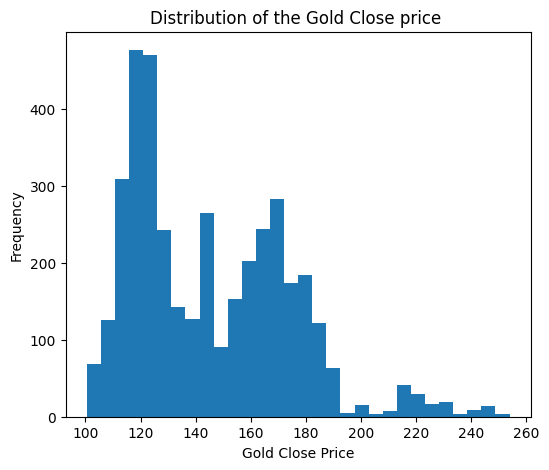

In [60]:
plt.figure(figsize=(6,5))
plt.hist(df["gold close"], bins=30)
plt.xlabel("Gold Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of the Gold Close price ")
plt.show()

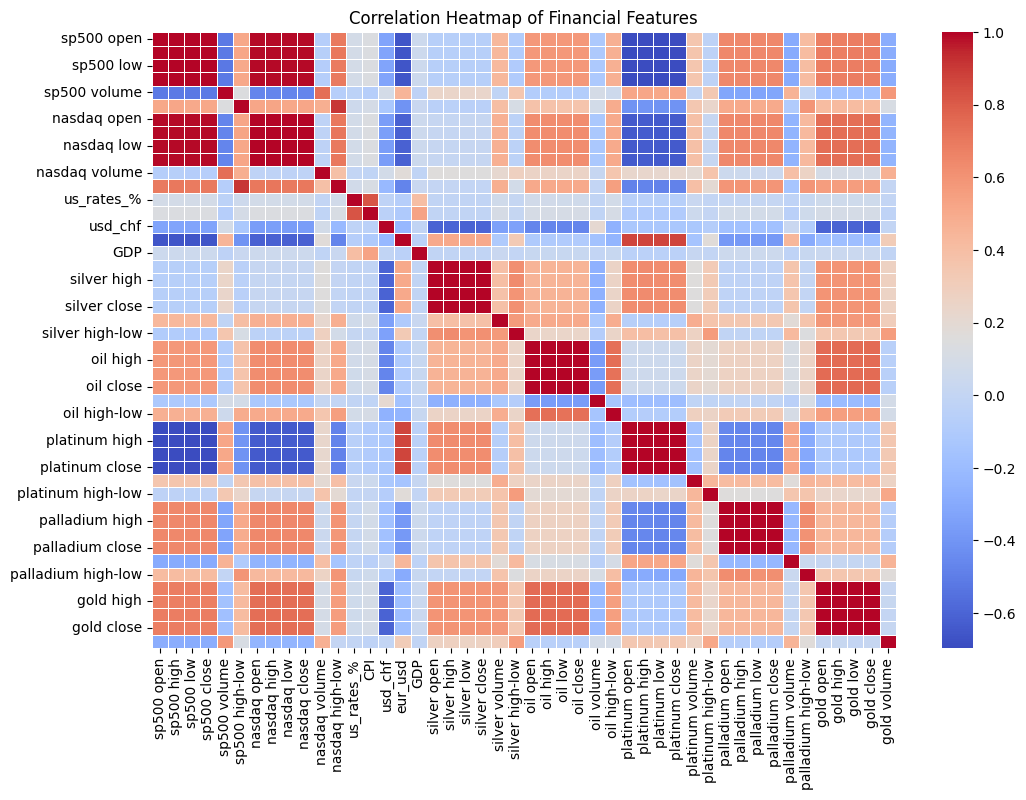

In [61]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Features")
plt.show()

importing 3D library.

In [62]:
from mpl_toolkits.mplot3d import Axes3D

pic chart with corr-relations

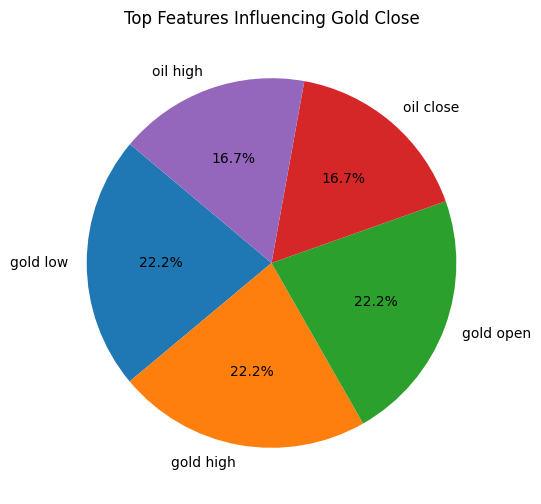

In [63]:
num_df = df.select_dtypes(include=["float64", "int64"])
target_corr = num_df.corr()["gold close"].drop("gold close")
top_features = target_corr.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
plt.pie(
    top_features.abs(),
    labels=top_features.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Top Features Influencing Gold Close")
plt.show()